<a href="https://colab.research.google.com/github/yongsa-nut/TU_CN409_GenAI_67_2/blob/main/GPT_Image_Demo_from_OpenAI_Cookbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate images with GPT Image

From OpenAI's cookbook: https://cookbook.openai.com/examples/generate_images_with_gpt_image#generate-an-image

## Set up

In [ ]:
!pip install pillow openai -U

In [ ]:
import base64
import os
from openai import OpenAI
from PIL import Image
from io import BytesIO
from IPython.display import Image as IPImage, display

In [ ]:
from google.colab import userdata

client = OpenAI(api_key= userdata.get('openai'))

In [ ]:
folder_path = "imgs"
os.makedirs(folder_path, exist_ok=True)

## Generate an image

GPT Image 1 is great at instruction-following, meaning you can prompt the model to generate images with very detailed instructions.

In [ ]:
prompt1 = """
Render a realistic image of this character:
Blobby Alien Character Spec Name: Glorptak (or nickname: "Glorp")
Visual Appearance Body Shape: Amorphous and gelatinous. Overall silhouette resembles a teardrop or melting marshmallow, shifting slightly over time. Can squish and elongate when emotional or startled.
Material Texture: Semi-translucent, bio-luminescent goo with a jelly-like wobble. Surface occasionally ripples when communicating or moving quickly.
Color Palette:
- Base: Iridescent lavender or seafoam green
- Accents: Subsurface glowing veins of neon pink, electric blue, or golden yellow
- Mood-based color shifts (anger = dark red, joy = bright aqua, fear = pale gray)
Facial Features:
- Eyes: 3–5 asymmetrical floating orbs inside the blob that rotate or blink independently
- Mouth: Optional—appears as a rippling crescent on the surface when speaking or emoting
- No visible nose or ears; uses vibration-sensitive receptors embedded in goo
- Limbs: None by default, but can extrude pseudopods (tentacle-like limbs) when needed for interaction or locomotion. Can manifest temporary feet or hands.
Movement & Behavior Locomotion:
- Slides, bounces, and rolls.
- Can stick to walls and ceilings via suction. When scared, may flatten and ooze away quickly.
Mannerisms:
- Constant wiggling or wobbling even at rest
- Leaves harmless glowing slime trails
- Tends to absorb nearby small objects temporarily out of curiosity
"""

img_path1 = "imgs/glorptak.jpg"

In [ ]:
# Generate the image
result1 = client.images.generate(
    model="gpt-image-1",
    prompt=prompt1,
    size="1024x1024"
)

In [ ]:
# Save the image to a file and resize/compress for smaller files
image_base64 = result1.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

# Adjust this if you want a high-quality Glorptak
image = Image.open(BytesIO(image_bytes))
image = image.resize((300, 300), Image.LANCZOS)
image.save(img_path1, format="JPEG", quality=80, optimize=True)

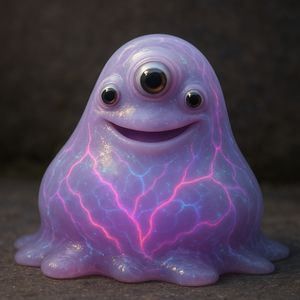

In [ ]:
# Show the result
display(IPImage(img_path1))

### Customize the output

You can customize the following output properties:

- Quality can be low, medium, high or auto (default value)
- Size can be 1024x1024 (square), 1536x1024 (portrait), 1024x1536 (landscape) or auto (default)
- You can adjust the compression level (from 0-100%) for JPEG and WEBP formats
- You can choose to generate an image with a transparent background (only available for PNG or WEBP)

In [ ]:
prompt2 = "generate a portrait, pixel-art style, of a grey tabby cat dressed as a blond woman on a dark background."
img_path2 = "imgs/cat_portrait_pixel.jpg"

In [ ]:
# Generate the image
result2 = client.images.generate(
    model="gpt-image-1",
    prompt=prompt2,
    quality="low",
    output_compression=50,
    output_format="jpeg",
    size="1024x1536"
)

In [ ]:
# Save the image to a file and resize/compress for smaller files
image_base64 = result2.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

image = Image.open(BytesIO(image_bytes))
image = image.resize((250, 375), Image.LANCZOS)
image.save(img_path2, format="JPEG", quality=80, optimize=True)

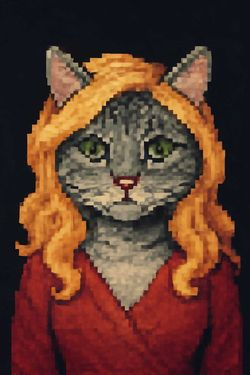

In [ ]:
# Show the result
display(IPImage(img_path2))

### Transparent background

You can use the `background` property to request a transparent background, but if you include in your prompt that you want a transparent background, it will be set to `transparent` by default.

In [ ]:
prompt3 = "generate a pixel-art style picture of a green bucket hat with a pink quill on a transparent background."
img_path3 = "imgs/hat.png"

In [ ]:
result3 = client.images.generate(
    model="gpt-image-1",
    prompt=prompt3,
    quality="low",
    output_format="png",
    size="1024x1024"
)
image_base64 = result3.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

In [ ]:
# Save the image to a file and resize/compress for smaller files
image_base64 = result3.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

image = Image.open(BytesIO(image_bytes))
image = image.resize((250, 250), Image.LANCZOS)
image.save(img_path3, format="PNG")

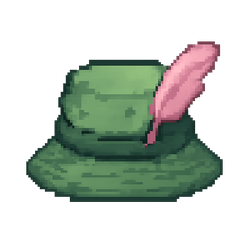

In [ ]:
# Show the result
display(IPImage(img_path3))

### Edit images

GPT Image can also accept image inputs, and use them to create new images. You can also provide a mask if you don't want the model to change a specific part of the input image.

You can use a maximum of 10 input images, and if you use a mask, it will be applied to the first image provided in the `image` array.

In [ ]:
prompt_edit = """
Combine the images of the cat and the hat to show the cat wearing the hat while being perched in a tree, still in pixel-art style.
"""
img_path_edit = "imgs/cat_with_hat.jpg"

In [ ]:
img1 = open(img_path2, "rb")
img2 = open(img_path3, "rb")

In [ ]:
# Generate the new image
result_edit = client.images.edit(
    model="gpt-image-1",
    image=[img1, img2],
    prompt=prompt_edit,
    size="1024x1536"
)

In [ ]:
# Save the image to a file and resize/compress for smaller files
image_base64 = result_edit.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

image = Image.open(BytesIO(image_bytes))
image = image.resize((250, 375), Image.LANCZOS)
image.save(img_path_edit, format="JPEG", quality=80, optimize=True)

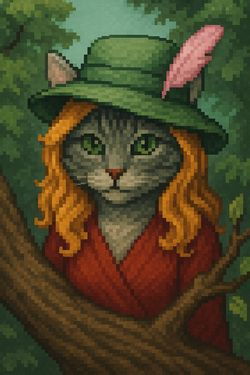

In [ ]:
# Show the result
display(IPImage(img_path_edit))

### Edit an image with a mask

You can also provide a mask along with your input images (if there are several, the mask will be applied on the first one) to edit only the part of the input image that is not covered by the mask. Please note that the model might still edit some parts of the image inside the mask, but it will avoid it.

Important note: the mask should contain an alpha channel. If you're generating it manually, for example using an image editing software, make sure you include this alpha channel.

#### Generating the mask

For this example, we'll use our model to generate the mask automatically for us. The mask might not be exact, but it will be enough for our purposes. If you need to have an exact mask, feel free to use an image segmentation model.

In [ ]:
img_path_mask = "imgs/mask.png"
prompt_mask = "generate a mask delimiting the entire character in the picture, using white where the character is and black for the background. Return an image in the same size as the input image."

In [ ]:
img_input = open(img_path1, "rb")

# Generate the mask
result_mask = client.images.edit(
    model="gpt-image-1",
    image=img_input,
    prompt=prompt_mask
)

In [ ]:
# Save the image to a file and resize/compress for smaller files
image_base64 = result_mask.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

image = Image.open(BytesIO(image_bytes))
image = image.resize((300, 300), Image.LANCZOS)
image.save(img_path_mask, format="PNG")

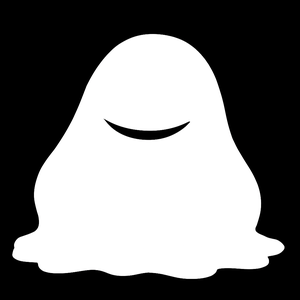

In [ ]:
# Show the mask
display(IPImage(img_path_mask))

#### Creating an alpha channel

This step is optional, if you want to turn a black & white image into a mask with an alpha channel that can be used in the Image Edit API.

In [ ]:
# 1. Load your black & white mask as a grayscale image
mask = Image.open(img_path_mask).convert("L")

# 2. Convert it to RGBA so it has space for an alpha channel
mask_rgba = mask.convert("RGBA")

# 3. Then use the mask itself to fill that alpha channel
mask_rgba.putalpha(mask)

# 4. Convert the mask into bytes
buf = BytesIO()
mask_rgba.save(buf, format="PNG")
mask_bytes = buf.getvalue()

In [ ]:
# Save the resulting file
img_path_mask_alpha = "imgs/mask_alpha.png"
with open(img_path_mask_alpha, "wb") as f:
    f.write(mask_bytes)

#### Editing with the mask

When using a mask, we still need the prompt the model describing the entiring resulting image, not just the area that is masked.

In [ ]:
prompt_mask_edit = "A strange character on a colorful galaxy background, with lots of stars and planets."
mask = open(img_path_mask_alpha, "rb")

In [ ]:
result_mask_edit = client.images.edit(
    model="gpt-image-1",
    prompt=prompt_mask_edit,
    image=img_input,
    mask=mask,
    size="1024x1024"
)

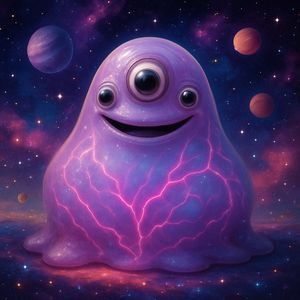

In [ ]:
# Display result

img_path_mask_edit = "imgs/mask_edit.png"

image_base64 = result_mask_edit.data[0].b64_json
image_bytes = base64.b64decode(image_base64)

image = Image.open(BytesIO(image_bytes))
image = image.resize((300, 300), Image.LANCZOS)
image.save(img_path_mask_edit, format="JPEG", quality=80, optimize=True)

display(IPImage(img_path_mask_edit))